In [95]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<div style="text-align: center">

# Be Steady My Heart
## Heart Failure Analysis
##### Jessica Chen, Malikka Rajshahi
##### May 8th, 2024
</div>

# Intro
Heart disease is the leading cause of death for both men and women worldwide. 

A range of factors can lead to heart failure; an analysis of these risk factors can be useful in providing valuable insights to healthcare professionals. 

The aim of this project is to understand heart failure through the analysis of its affecting factors. 

# Objectives
- Investigate patterns and trends in heart failure
- Identify key attributes that can induce heart failure
- Develop a model for heart failure prediction


## To Add: INTRO, OBJECTIVE, Explain meaning of dataset columns

## Data Retrieval

In [141]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Exploration

1. Check data type of each column and total number of rows

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


2. Check the number of rows and columns in the dataset

In [98]:
df.shape

(918, 12)

3. Check basic statistics for continuous data columns

In [99]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


4. Checking for null values in the dataset

In [100]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for Outliers
Using visualization to identify outliers

### 1. Checking Cholesterol for Outliers

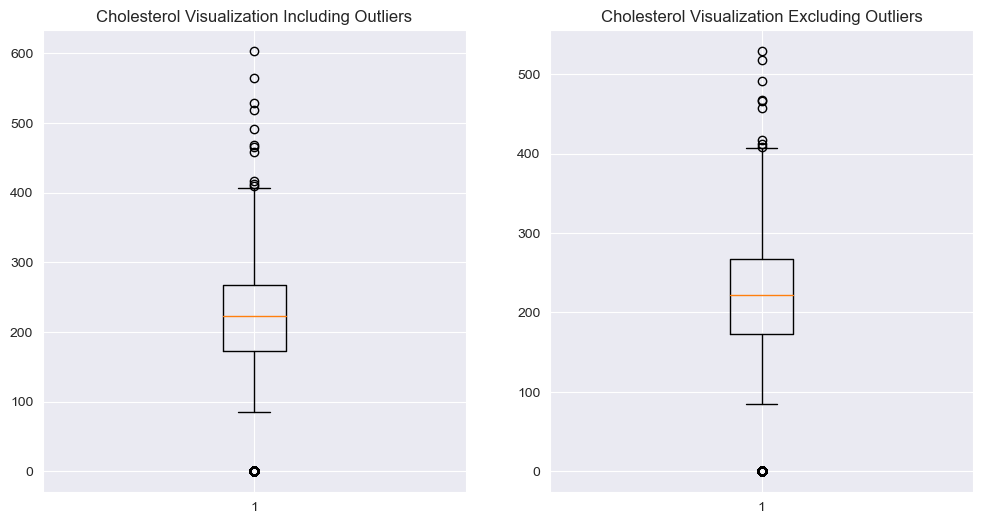

In [101]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='Cholesterol')
axes[0].set_title('Cholesterol Visualization Including Outliers')

axes[1].boxplot(df[(df.Cholesterol<=550)]['Cholesterol'])
axes[1].set_title('Cholesterol Visualization Excluding Outliers');

#### Decision: We will remove cholestrol levels greater than 550 mg/dL because cholesterol levels between 350 mg/dL to 550 mg/dL are common in people who have the genetic disorder called heterozygous familial hypercholesterolemia, which affects 1 in 250 people. We will fill the missing cholesterol (cholesterol == 0) with median cholesterol. 
Source 1: https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601

Source 2: https://en.wikipedia.org/wiki/Familial_hypercholesterolemia

### 2. Checking Resting Blood Pressure for Outliers

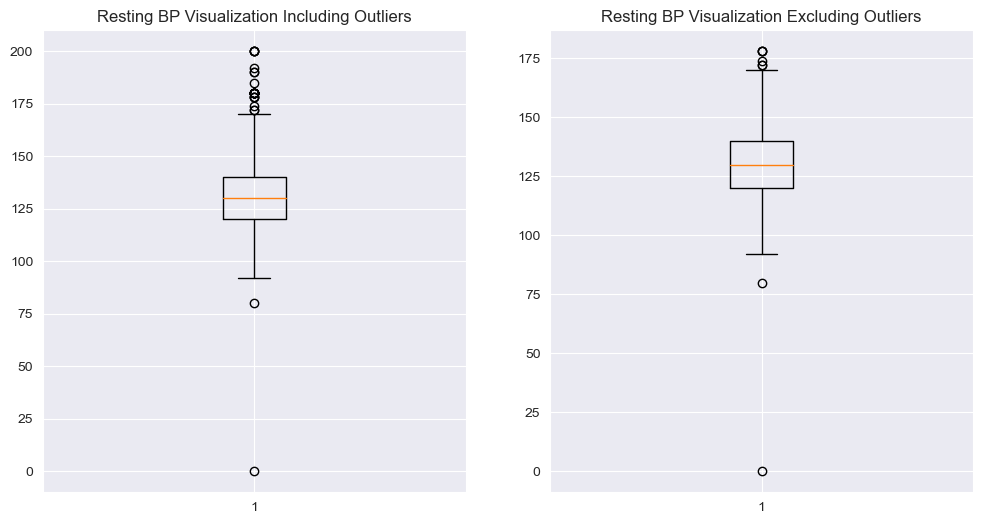

In [102]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)

axes[0].boxplot(data=df, x='RestingBP')
axes[0].set_title('Resting BP Visualization Including Outliers')

axes[1].boxplot(df[df.RestingBP<180]['RestingBP']) 
axes[1].set_title('Resting BP Visualization Excluding Outliers');

#### Decision: Blood pressure levels > 180 mm Hg is considered Hypertensive Crisis and late stage of high blood pressure. Since our study will focus on early prediction of heart disease, we will exclude blood pressure levels > 180 mm Hg.
(https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

### 3. Checking Max Heart Rate for Outliers

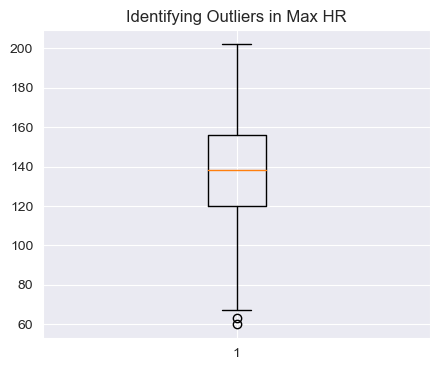

In [103]:
fig=plt.figure(figsize=(5,4))
plt.boxplot(df.MaxHR) 
plt.title('Identifying Outliers in Max HR');


#### Decision: Since the boxplot does not have many outliers and heart rates between 60 and 70 is within reasonable range for adults, so we will keep these data.

### 4. Distribution of Age

Skewness of Age: -0.19561273124487544


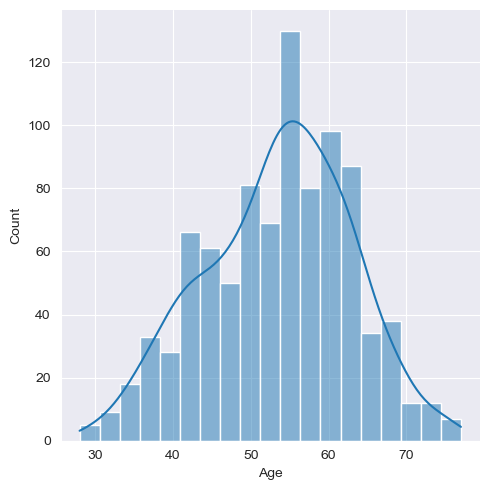

In [104]:
sns.set_style('darkgrid')
sns.displot(df, x='Age', kde=True);
skewness=stats.skew(df['Age'])
print('Skewness of Age:', skewness)

The distribution of Age values is close to normal since the skewness is almost 0.

### 5. Distribution of RestingBP

Skewness of RestingBP: 0.17954532149156327


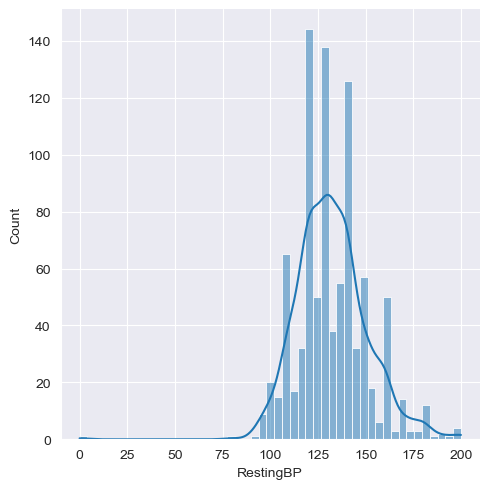

In [105]:
sns.set_style('darkgrid')
sns.displot(df, x='RestingBP', kde=True);
skewness=stats.skew(df['RestingBP'])
print('Skewness of RestingBP:', skewness)

The distribution of RestingBP values is close to normal since the skewness is almost 0.

### 5. Distribution of Cholesterol

Skewness of Cholesterol: -0.6090891046626045


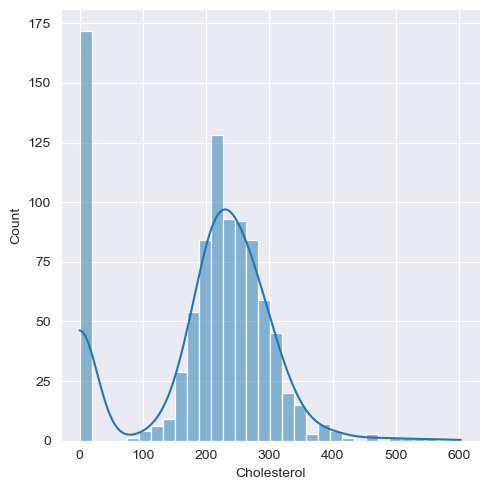

In [106]:
sns.set_style('darkgrid')
sns.displot(df, x='Cholesterol', kde=True);
skewness=stats.skew(df['Cholesterol'])
print('Skewness of Cholesterol:', skewness)

The distribution of Cholesterol values has a skewness close to 1, which indicates the data is more concentrated to the left.

### 6. Distribution of MaxHR

Skewness of MaxHR: -0.14412342991429325


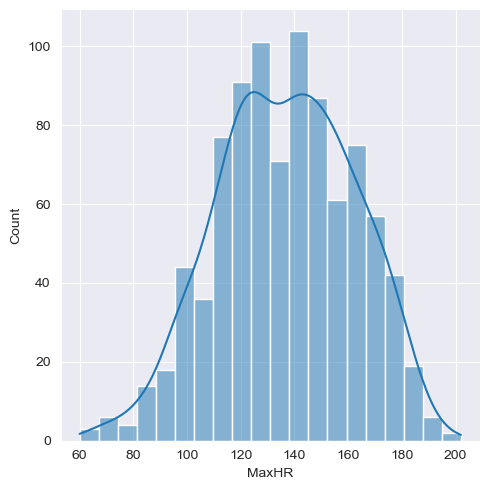

In [107]:
sns.set_style('darkgrid')
sns.displot(df, x='MaxHR', kde=True);
skewness=stats.skew(df['MaxHR'])
print('Skewness of MaxHR:', skewness)

The distribution of MaxHR values is close to normal since the skewness is almost 0.

### 7. Percentage of People with HD vs. no-HD

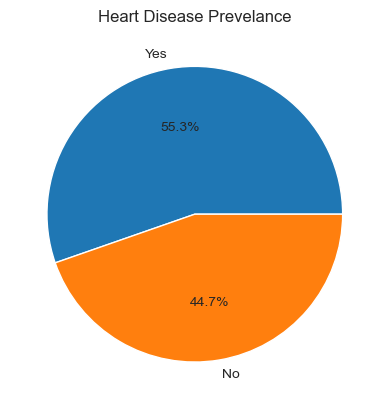

In [108]:
data = [np.size(df[df.HeartDisease==1]['HeartDisease']), np.size(df[df.HeartDisease==0]['HeartDisease'])]
plt.pie(data, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Heart Disease Prevelance');

### 8. Observing the Relationship Between Categorical Features and Heart Disease

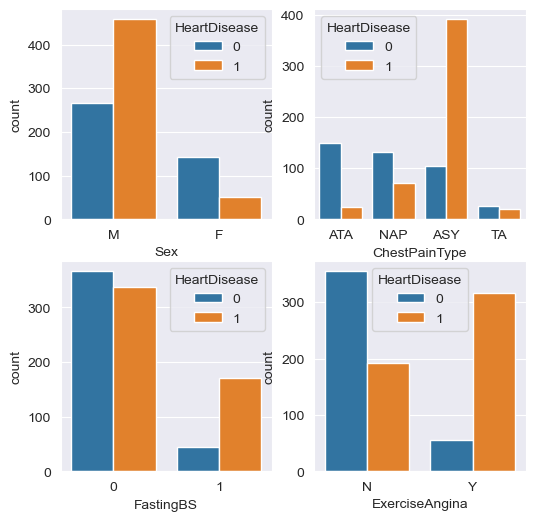

In [109]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Sex', hue='HeartDisease')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')

plt.show()

### 9. Observing Relationsihp Between Continuous Attributes and Heart Disease

/var/folders/2b/lqbnbrxd07746bw424lpkh8c0000gq/T/ipykernel_1436/2369585308.py:1: FutureWarning: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data = df.groupby('HeartDisease').agg(['mean', 'min', 'max', 'median'])


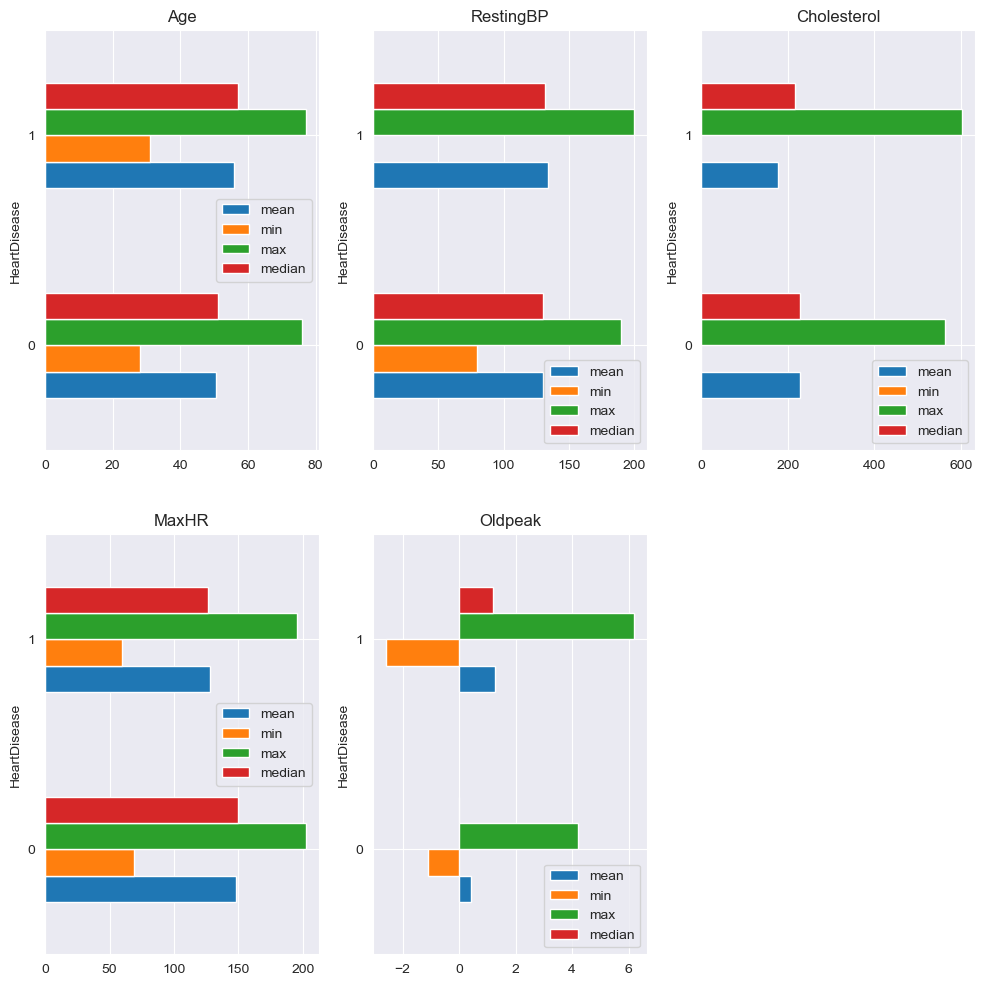

In [110]:
data = df.groupby('HeartDisease').agg(['mean', 'min', 'max', 'median'])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

axs = axs.flatten()

data['Age'].plot(kind='barh', ax=axs[0]).set_title('Age')

data['RestingBP'].plot(kind='barh', ax=axs[1]).set_title('RestingBP')

data['Cholesterol'].plot(kind='barh', ax=axs[2]).set_title('Cholesterol')

data['MaxHR'].plot(kind='barh', ax=axs[3]).set_title('MaxHR')

data['Oldpeak'].plot(kind='barh', ax=axs[4]).set_title('Oldpeak')

axs[5].axis('off');

In [111]:
# NOT SURE
df[['RestingBP', 'MaxHR', 'Cholesterol', 'HeartDisease']].groupby('HeartDisease').agg('mean')

,RestingBP,MaxHR,Cholesterol
HeartDisease,,,
0,130.180488,148.151220,227.121951
1,134.185039,127.655512,175.940945


## Pre-processing

### Removing Outliers

- remove rows with Cholesterol > 550 mg/dL
- remove rows with RestingBP > 180 mm Hg

In [112]:
df=df[(df.Cholesterol<=550)]
df=df[df.RestingBP<=180]

### Handling Missing Values

1. Replace missing cholesterol values (Cholesterol == 0) with median cholesterol value

In [113]:
c=df['Cholesterol']
c_median=c[c>0].median()
df['Cholesterol']=df['Cholesterol'].replace(0,c_median)

2. Replace missing resting blood pressure value (RestingBP == 0) with median resting blood pressure value 

In [114]:
rbp_median=df[df.RestingBP!=0]['RestingBP'].median() 
df['RestingBP']=df['RestingBP'].replace(0,rbp_median)

### Data Binning and Mapping
1. Using MaxHR to create a new categorical column

In [115]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [116]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

In [117]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,High
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Mid-High
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Low
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Low-Mid


2. Map RestingBP values to different blood pressure stages. 
- Normal: < 120 mm Hg
- Elevated: 120- 129 mm Hg
- Hypertension Stage 1: 130 - 139 mm Hg
- Hypertension Stage 2: 140 - 180 mm Hg

(https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

In [118]:
def bpGroup(bp):
    if (bp<120):
        return('Normal')
    elif (bp>=120 and bp<=129):
        return('Elevated')
    elif (bp>=130 and bp<=139):
        return('Hypertension S1')
    else:
        return('Hypertension S2')
    
df['BP_Stage']=df['RestingBP'].apply(bpGroup)

3. Map Age values to different age groups.

In [119]:
def ageGroup(a):
    if (a>=30 and a<40):
        return('30 - 39')
    elif (a>=40 and a<50):
        return('40 - 49')
    elif (a>=50 and a<60):
        return('50 - 59')
    elif (a>=60 and a<70):
        return('60 - 69')
    elif (a>=70 and a<80):
        return('70 - 79')
    else:
        return('80+')
    
df['AgeGroup']=df['Age'].apply(ageGroup)

4. For HeartDisease column, map 0 to 'no' and 1 to 'yes'.

In [120]:
df['HeartDisease']=df['HeartDisease'].replace(0,'No')
df['HeartDisease']=df['HeartDisease'].replace(1,'Yes')

5. For FastingBS column, map 0 to 'Normal' and 1 to 'Elevated' (ADD SOURCE)

In [121]:
df['FastingBS']=df['FastingBS'].replace(0,'Normal')
df['FastingBS']=df['FastingBS'].replace(1,'Elevated')

### Normalization

In [122]:
# NORMALIZATION IS USEFUL FOR DOING KMEANS
# CAN ADD WHEN WE GET UP TO THE MACHINE LEARNING SECTION

## Analysis

### Relationship between fasting blood sugar level and heart disease

In [123]:
bsdf=df.pivot_table(index='HeartDisease', columns='FastingBS', aggfunc='size')
bsdf['Total']=df.groupby('HeartDisease').agg('size')
bsdf['%_of_Elevated']=bsdf.Elevated/bsdf.Total*100
bsdf['%_of_Normal']=bsdf.Normal/bsdf.Total*100
bsdf

FastingBS,Elevated,Normal,Total,%_of_Elevated,%_of_Normal
HeartDisease,,,,,
No,44,364,408,10.784314,89.215686
Yes,166,334,500,33.200000,66.800000


In [124]:
total_elevated=sum(bsdf.Elevated)
pct_hd_elevated=(bsdf.loc['Yes', 'Elevated']/total_elevated)*100
print('Percent of patients with elevated blood sugar levels who developed heart disease: %.2f'%pct_hd_elevated,'%')

Percent of patients with elevated blood sugar levels who developed heart disease: 79.05 %


Insight: Among the patients without heart disease, 10.7% of them have elevated fasting blood sugar levels (>120 mg/dL). Among the patients with heart disease, 33.3% of them have elevated fasting blood sugar levels. Nearly 80% of patients with elevated blood sugar levels have developed heart disease. This means fasting blood sugar levels can be a good indicator of heart disease.

### Relationship between blood pressure and heart disease

In [125]:
bpdf=df.pivot_table(index='HeartDisease', columns='BP_Stage', aggfunc='size')
bpdf['Total']=df.groupby('HeartDisease').agg('size')
bpdf['%_of_Hypertension_S2']=(bpdf['Hypertension S2']/bpdf.Total)*100
bpdf

BP_Stage,Elevated,Hypertension S1,Hypertension S2,Normal,Total,%_of_Hypertension_S2
HeartDisease,,,,,,
No,108,107,121,72,408,29.656863
Yes,106,109,198,87,500,39.600000


In [126]:
total_h2=sum(bpdf['Hypertension S2'])
pct_hd_h2=(bpdf.loc['Yes', 'Hypertension S2']/total_h2)*100
print('Percent of patients with hypertension stage 2 who developed heart disease: %.2f'%pct_hd_h2,'%')

Percent of patients with hypertension stage 2 who developed heart disease: 62.07 %


Insight: The pivot table above shows blood pressure levels of 2 groups of people - group 1 has no heart disease, group 2 has heart disease. The number of people with elevated or hypertension stage 1 blood pressure levels are about the same between the 2 groups. Among the people without heart disease, 29.7% of them have hypertension stage 2. Among the people with heart disease, nearly 40% of them have hypertension stage 2, which is 10% more than the group without heart disease. Among all the people who have hypertension stage 2, more than 60% of them have developed heart disease. This means blood pressure with hypertension stage 2 can be a good indicator for predicting heart disease.

## Visualizations

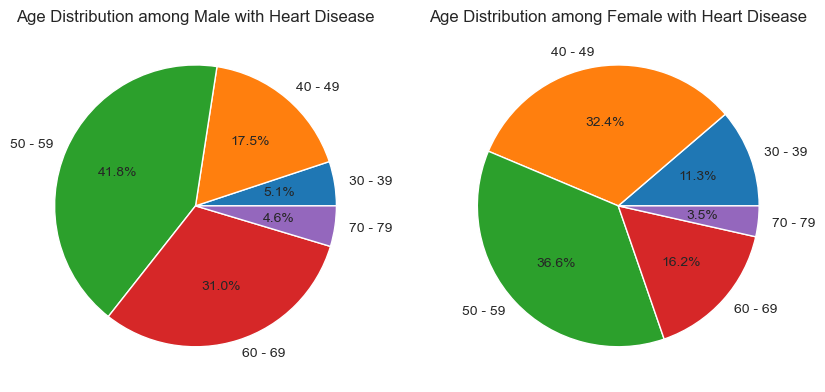

In [127]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(6)

mdf = df[(df.HeartDisease=='Yes') & (df.Sex=='M')].groupby('AgeGroup').agg('size')
axes[0].pie(mdf, labels=mdf.index, autopct='%1.1f%%')
axes[0].set_title('Age Distribution among Male with Heart Disease')

fdf = df[(df.HeartDisease=='No') & (df.Sex=='F')].groupby('AgeGroup').agg('size')
axes[1].pie(fdf, labels=fdf.index, autopct='%1.1f%%')
axes[1].set_title('Age Distribution among Female with Heart Disease');

2. Show relationships between Oldpeak, ST_Slope, heart disease --> help doctors utilize ST Depression curve to predict Heart Disease

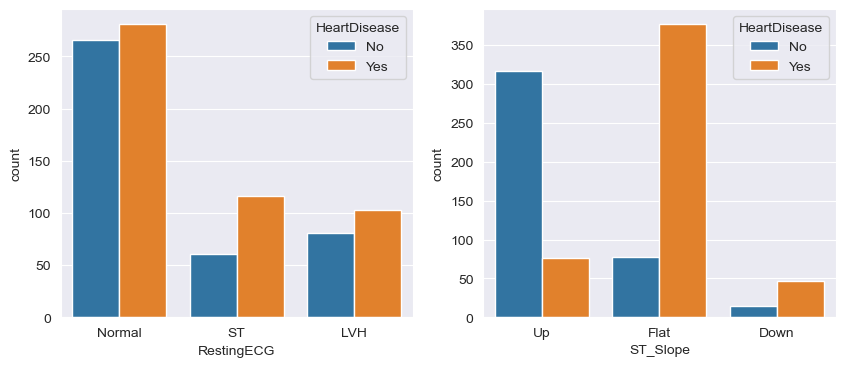

In [128]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(df, x='RestingECG', hue='HeartDisease', ax=ax[0])
sns.countplot(df, x='ST_Slope', hue='HeartDisease', ax=ax[1]);

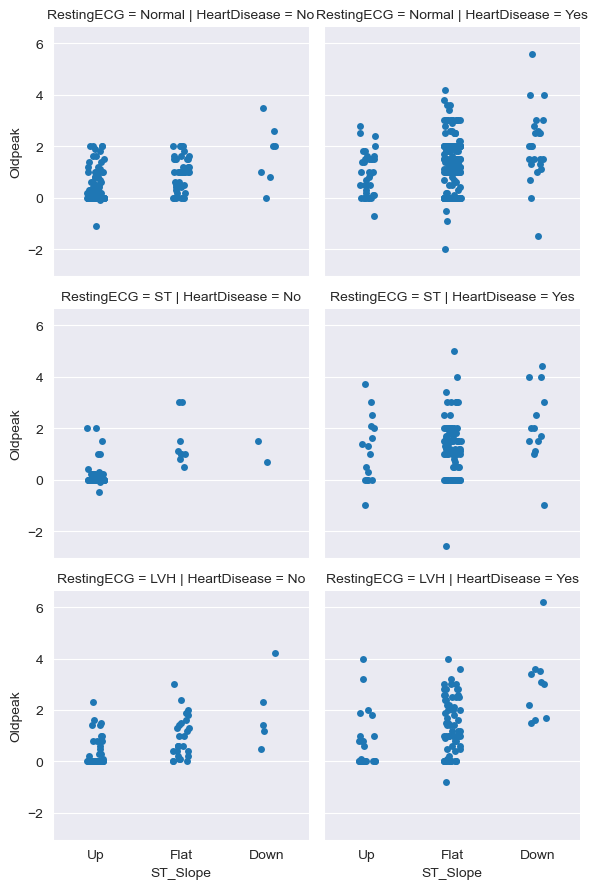

In [129]:
x_order=df.ST_Slope.unique()
sns.FacetGrid(data=df, col='HeartDisease', row='RestingECG').map(sns.stripplot, 'ST_Slope', 'Oldpeak', order=x_order);

In [130]:
# sns.set_style('darkgrid')
# sns.displot(data=df, x='Age', hue='HeartDisease');

In [131]:
# sns.kdeplot(data=df[df.Sex=='F'], x='Age', hue='HeartDisease');

In [132]:
# sns.kdeplot(data=df[df.Sex=='M'], x='Age', hue='HeartDisease', fill=True);

# ML Model: K-Nearest Neighbors

#### 1. Making sure all 'Object' columns in the DataFrame are converted to an appropriate dtype

In [228]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [229]:
def convertObjects(x):
    if x.dtype == 'O': return x.astype('string')
    else: return x

df = df.apply(convertObjects)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


#### 2. Converting all categorical attributes to numerical attributes using encoding and standardization

In [230]:
import sklearn.preprocessing as skp

df['Sex_M'] = skp.LabelEncoder().fit_transform(df['Sex'])
df[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down']] = skp.LabelBinarizer().fit_transform(df['ST_Slope'])
df[['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'ChestPainType_TA']] = skp.LabelBinarizer().fit_transform(df['ChestPainType'])
df[['RestingECG_Normal', 'RestingECG_ST', 'RestingECG_LVH']] = skp.LabelBinarizer().fit_transform(df['RestingECG'])
df['ExerciseAngina'] = skp.LabelEncoder().fit_transform(df['ExerciseAngina'])

df = df.drop(['Sex', 'ST_Slope', 'ChestPainType', 'RestingECG'], axis=1)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,1,0,1,0,0,0,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,0,1,0,0,1,0,0,1,0


#### 3. Normalizing the data

In [239]:
import sklearn.preprocessing as skp

df['Age'] = skp.MinMaxScaler().fit_transform(df['Age'].values.reshape(-1, 1))
df['RestingBP'] = skp.MinMaxScaler().fit_transform(df['RestingBP'].values.reshape(-1, 1))
df['Cholesterol'] = skp.MinMaxScaler().fit_transform(df['Cholesterol'].values.reshape(-1, 1))
df['FastingBS'] = skp.MinMaxScaler().fit_transform(df['FastingBS'].values.reshape(-1, 1))
df['MaxHR'] = skp.MinMaxScaler().fit_transform(df['MaxHR'].values.reshape(-1, 1))
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,0.244898,0.70,0.479270,0.0,0.788732,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0
1,0.428571,0.80,0.298507,0.0,0.676056,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0,0.0,0,1,0,0,1,0,1,0,0,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,1,1.5,1,0,0,1,0,1,0,0,0,0,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0,0.0,0,1,0,0,1,0,0,1,0,0,1,0


#### 4. Defining the KNN model

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as m 

# defining x and y
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

# splitting train/test data
x_train, x_test, y_train, y_test = train_test_split(df, df['HeartDisease'])

n = np.sqrt(np.size(df.index)).astype('int')
model = KNeighborsClassifier(n)

model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

#### 5. Testing the model with test data

In [241]:
y_hat = model.predict(x_test.values)

cm = m.confusion_matrix(y_test, y_hat)
print(cm)
print(f'Accuracy Score: {m.accuracy_score(y_test, y_hat)}')

[[100  11]
 [  6 113]]
Accuracy Score: 0.9260869565217391


/Users/malikashahi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  break


#### 6. Plotting the learning curves

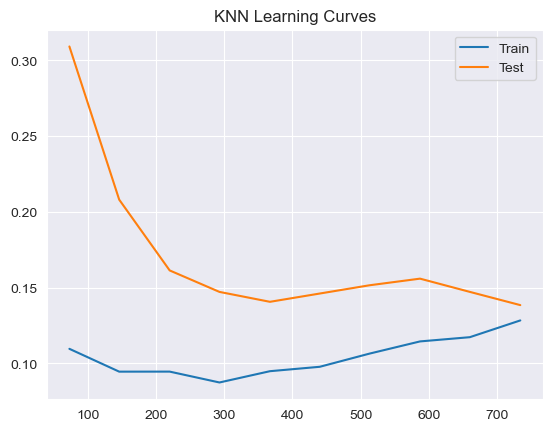

In [242]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X.values, Y, train_sizes=np.linspace(.1, 1, 10), scoring='neg_mean_squared_error')
train_mean_score = -np.mean(train_scores, axis=1)
test_mean_score = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean_score, label='Train')
plt.plot(train_sizes, test_mean_score, label='Test')
plt.title('KNN Learning Curves')
plt.legend(loc=1);